In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def same(*args):
    for arg in args:
        assert args[0] == arg
    return args[0]

In [4]:
def chebyshev_1(n):
    return np.cos((np.arange(n)*2 + 1) / (2*n) * np.pi)


chebyshev_1(10)

array([ 0.98768834,  0.89100652,  0.70710678,  0.4539905 ,  0.15643447,
       -0.15643447, -0.4539905 , -0.70710678, -0.89100652, -0.98768834])

# Probleme

## 1

In [5]:
def lagrange_polys(
    points,
    nodes,
):
    n = len(nodes)
    
    xk = np.repeat(nodes.reshape(-1, 1), n-1, 1)
    xj = np.repeat(nodes.reshape(1, -1), n, 0)[~np.eye(n, dtype=bool)].reshape(n, -1)
    ls = []
    for x in points:
        lx = np.prod(x - xj, 1) / np.prod(xk - xj, 1)
        ls.append(lx)
    ls = np.array(ls)
    ls = ls.T
    return ls


def lagrange_inter(
    points,
    nodes,
    values,
):
    same(1, len(nodes.shape), len(values.shape))
    same(len(nodes), len(values))

    output = np.zeros_like(points)

    polys = lagrange_polys(points, nodes)
    polys = polys.T

    for i, poly in enumerate(polys):
        output[i] = np.sum(poly * values)
    return output


def f(x):
    return x*x


nodes = np.array([1, 2, 3])
points = np.array([0.5, 1.5, 2.5])
print(
    lagrange_inter(
        points,
        nodes,
        f(nodes),
    )
)
print(f(points))

[0.25 2.25 6.25]
[0.25 2.25 6.25]


## 2 si 3

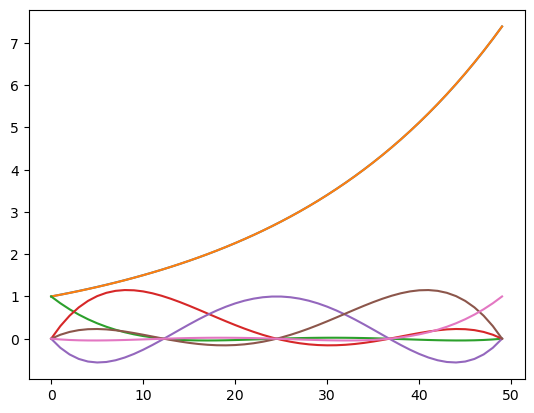

In [60]:
points = np.linspace(0, 2)
p1 = np.exp(points)

nodes = np.linspace(0, 2, num=5)
p2 = lagrange_inter(
    points,
    nodes,
    np.exp(nodes),
)

polys = np.array(lagrange_polys(points, nodes))

plt.plot(p1)
plt.plot(p2)
for poly in polys:
    plt.plot(poly)

## 4

In [5]:
points = np.linspace(0, 10)
nodes = np.linspace(0, 10, num=5)
func_approx = lagrange_inter(
    points,
    nodes,
    np.sqrt(nodes),
)
func = np.sqrt(points)

print(func)
print(func_approx)

[0.         0.45175395 0.63887656 0.7824608  0.9035079  1.01015254
 1.10656667 1.19522861 1.27775313 1.35526185 1.42857143 1.49829835
 1.56492159 1.62882204 1.69030851 1.74963553 1.80701581 1.86262926
 1.91662969 1.96914982 2.02030509 2.07019668 2.11891385 2.16653584
 2.21313334 2.25876976 2.30350221 2.34738239 2.39045722 2.43276948
 2.4743583  2.51525955 2.55550626 2.59512887 2.63415556 2.67261242
 2.71052371 2.74791201 2.78479838 2.82120252 2.85714286 2.89263668
 2.92770022 2.96234876 2.99659671 3.03045763 3.06394437 3.09706906
 3.12984319 3.16227766]
[0.         0.19458647 0.37454041 0.54080757 0.6943026  0.83590907
 0.96647943 1.08683505 1.19776618 1.30003199 1.39436053 1.48144877
 1.56196257 1.63653669 1.7057748  1.77024946 1.83050213 1.88704318
 1.94035188 1.99087638 2.03903377 2.08521    2.12975994 2.17300736
 2.21524493 2.25673422 2.2977057  2.33835874 2.3788616  2.41935147
 2.45993442 2.5006854  2.54164831 2.58283591 2.62422988 2.66578079
 2.70740812 2.74900024 2.79041444 2.83

## 5

In [6]:
def lagrange_barycentric_inter(
    points,
    nodes,
    values,
):
    assert len(nodes.shape) == len(values.shape) == 1
    assert len(nodes) == len(values)
    n = len(nodes)

    output = np.zeros_like(points)

    xk = np.repeat(nodes.reshape(-1, n), n, 0)[~np.eye(n, dtype=bool)].reshape(n, -1)
    xj = nodes.reshape(n, -1)
    wj = 1 / np.prod(xj - xk, 1)
    for i, x in enumerate(points):
        q = (wj / (x - nodes))
        output[i] = np.sum(q * values) / np.sum(q)
    return output


def f(x):
    return x*x


nodes = np.array([1, 2, 3])
lagrange_barycentric_inter(
    np.array([0, 1, 2]) + 0.15,
    nodes,
    f(nodes),
)

array([0.0225, 1.3225, 4.6225])

/tmp/ipykernel_212488/991073643.py:16: RuntimeWarning: divide by zero encountered in divide
  q = (wj / (x - nodes))
/tmp/ipykernel_212488/991073643.py:17: RuntimeWarning: invalid value encountered in scalar divide
  output[i] = np.sum(q * values) / np.sum(q)


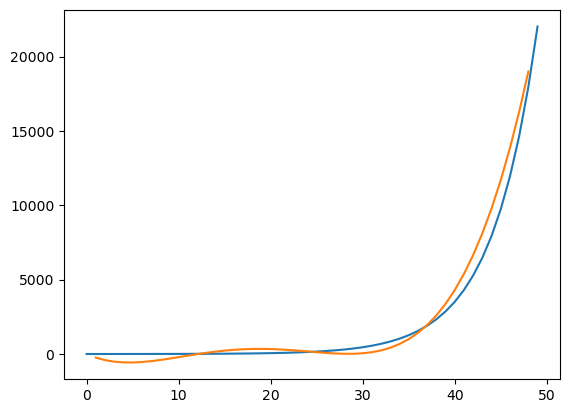

In [7]:
points = np.linspace(0, 10)
p1 = np.exp(points)

nodes = np.linspace(0, 10, num=5)
p2 = lagrange_barycentric_inter(
    points,
    nodes,
    np.exp(nodes),
)

plt.plot(p1)
plt.plot(p2)

# Probleme practice

## 1

In [8]:
t = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
y = np.array([75995, 91972, 105711, 123203, 131669, 150697, 179323, 203212, 226505, 249633, 281422, 308786])
points = np.array([1975, 2018])

lagrange_inter(
    points,
    t,
    y,
)

array([  214364, 10787593])

## 2

In [9]:
def f(x):
    return np.exp(x**2 - 1)


points = np.array([1.25])
nodes = np.array([1, 1.1, 1.2, 1.3, 1.4])
values = f(nodes)

print(lagrange_inter(points, nodes, values))
print(f(1.25))

[1.75495733]
1.7550546569602985


## 3

In [10]:
np.sqrt(115)

10.723805294763608

In [20]:
points = np.array([115], dtype=float)
values = np.arange(5, 15, dtype=float)
nodes = values**2

lagrange_inter(points, nodes, values)

array([10.7238398])

## 4

### Runge

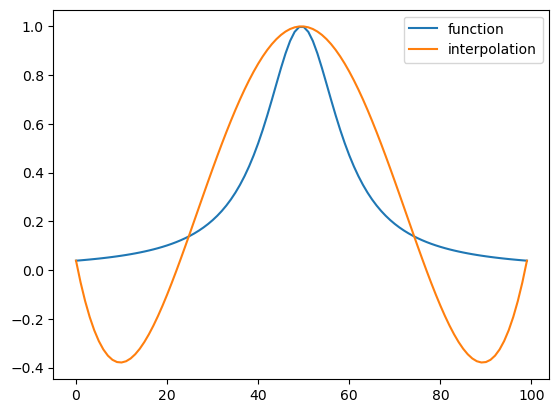

In [62]:
def f(x):
    return 1 / (1 + x**2)


points = np.linspace(-5, 5, num=100)

nodes = np.linspace(-5, 5, num=5)
p1 = f(points)
p2 = lagrange_inter(
    points,
    nodes,
    f(nodes),
)

plt.plot(p1)
plt.plot(p2)
plt.legend(["function", "interpolation"])

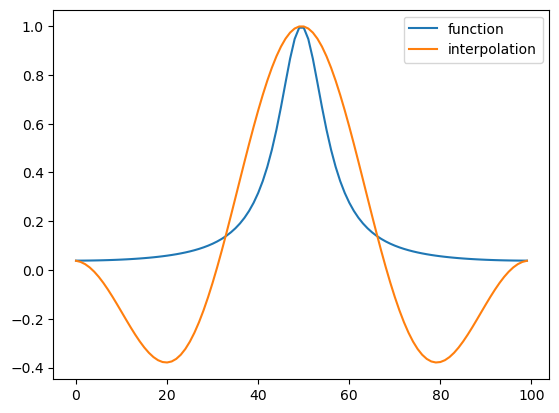

In [63]:
points = chebyshev_1(100) * 5

nodes = np.linspace(-5, 5, num=5)
p1 = f(points)
p2 = lagrange_inter(
    points,
    nodes,
    f(nodes),
)

plt.plot(p1)
plt.plot(p2)
plt.legend(["function", "interpolation"])

### Bernstein

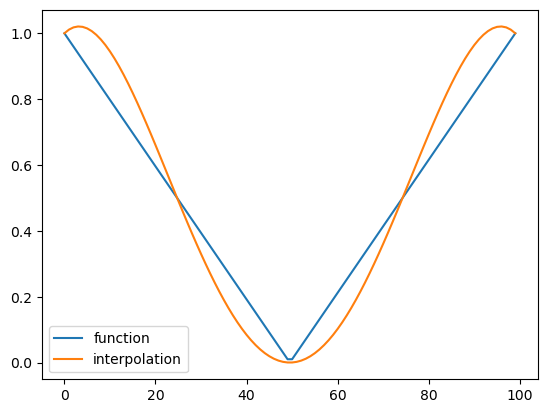

In [64]:
def f(x):
    return np.abs(x)


points = np.linspace(-1, 1, num=100)

nodes = np.linspace(-1, 1, num=5)
p1 = f(points)
p2 = lagrange_inter(
    points,
    nodes,
    f(nodes),
)

plt.plot(p1)
plt.plot(p2)
plt.legend(["function", "interpolation"])

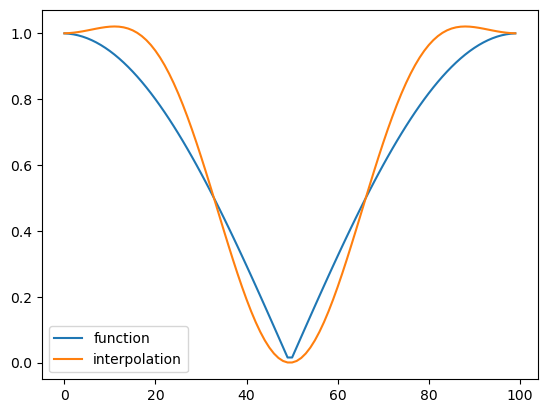

In [65]:
points = chebyshev_1(100)

nodes = np.linspace(-1, 1, num=5)
p1 = f(points)
p2 = lagrange_inter(
    points,
    nodes,
    f(nodes),
)

plt.plot(p1)
plt.plot(p2)
plt.legend(["function", "interpolation"])